In [7]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
#from mpl_toolkits.basemap import Basemap, shiftgrid
from netCDF4 import Dataset
# specify date to plot.
yyyy=1993; mm=3; dd=14; hh=0
date = datetime.datetime(yyyy,mm,dd,hh)
# set OpenDAP server URL.
URLbase="http://nomads.ncdc.noaa.gov/thredds/dodsC/modeldata/cmd_pgbh/"
URL=URLbase+"%04i/%04i%02i/%04i%02i%02i/pgbh00.gdas.%04i%02i%02i%02i.grb2" %\
             (yyyy,yyyy,mm,yyyy,mm,dd,yyyy,mm,dd,hh)
data = Dataset(URL)
# read lats,lons
# reverse latitudes so they go from south to north.
latitudes = data.variables['lat'][::-1]
longitudes = data.variables['lon'][:].tolist()
# get sea level pressure and 10-m wind data.
# mult slp by 0.01 to put in units of hPa.
slpin = 0.01*data.variables['Pressure_msl'][:].squeeze()
uin = data.variables['U-component_of_wind_height_above_ground'][:].squeeze()
vin = data.variables['V-component_of_wind_height_above_ground'][:].squeeze()
# add cyclic points manually (could use addcyclic function)
slp = np.zeros((slpin.shape[0],slpin.shape[1]+1),np.float)
slp[:,0:-1] = slpin[::-1]; slp[:,-1] = slpin[::-1,0]
u = np.zeros((uin.shape[0],uin.shape[1]+1),np.float64)
u[:,0:-1] = uin[::-1]; u[:,-1] = uin[::-1,0]
v = np.zeros((vin.shape[0],vin.shape[1]+1),np.float64)
v[:,0:-1] = vin[::-1]; v[:,-1] = vin[::-1,0]
longitudes.append(360.); longitudes = np.array(longitudes)
# make 2-d grid of lons, lats
lons, lats = np.meshgrid(longitudes,latitudes)
# make orthographic basemap.
m = Basemap(resolution='c',projection='ortho',lat_0=60.,lon_0=-60.)
# create figure, add axes
fig1 = plt.figure(figsize=(8,10))
ax = fig1.add_axes([0.1,0.1,0.8,0.8])
# set desired contour levels.
clevs = np.arange(960,1061,5)
# compute native x,y coordinates of grid.
x, y = m(lons, lats)
# define parallels and meridians to draw.
parallels = np.arange(-80.,90,20.)
meridians = np.arange(0.,360.,20.)
# plot SLP contours.
CS1 = m.contour(x,y,slp,clevs,linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(x,y,slp,clevs,cmap=plt.cm.RdBu_r,animated=True)
# plot wind vectors on projection grid.
# first, shift grid so it goes from -180 to 180 (instead of 0 to 360
# in longitude).  Otherwise, interpolation is messed up.
ugrid,newlons = shiftgrid(180.,u,longitudes,start=False)
vgrid,newlons = shiftgrid(180.,v,longitudes,start=False)
# transform vectors to projection grid.
uproj,vproj,xx,yy = \
m.transform_vector(ugrid,vgrid,newlons,latitudes,31,31,returnxy=True,masked=True)
# now plot.
Q = m.quiver(xx,yy,uproj,vproj,scale=700)
# make quiver key.
qk = plt.quiverkey(Q, 0.1, 0.1, 20, '20 m/s', labelpos='W')
# draw coastlines, parallels, meridians.
m.drawcoastlines(linewidth=1.5)
m.drawparallels(parallels)
m.drawmeridians(meridians)
# add colorbar
cb = m.colorbar(CS2,"bottom", size="5%", pad="2%")
cb.set_label('hPa')
# set plot title
ax.set_title('SLP and Wind Vectors '+str(date))
plt.show()

# create 2nd figure, add axes
fig2 = plt.figure(figsize=(8,10))
ax = fig2.add_axes([0.1,0.1,0.8,0.8])
# plot SLP contours
CS1 = m.contour(x,y,slp,clevs,linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(x,y,slp,clevs,cmap=plt.cm.RdBu_r,animated=True)
# plot wind barbs over map.
barbs = m.barbs(xx,yy,uproj,vproj,length=5,barbcolor='k',flagcolor='r',linewidth=0.5)
# draw coastlines, parallels, meridians.
m.drawcoastlines(linewidth=1.5)
m.drawparallels(parallels)
m.drawmeridians(meridians)
# add colorbar
cb = m.colorbar(CS2,"bottom", size="5%", pad="2%")
cb.set_label('hPa')
# set plot title.
ax.set_title('SLP and Wind Barbs '+str(date))
plt.show()

ImportError: No module named 'netCDF4'

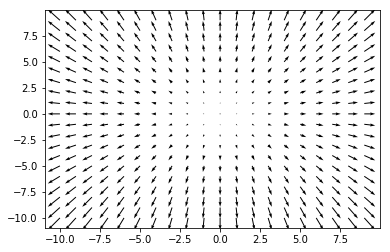

In [10]:
'''
==================================================
A simple example of a quiver plot with a quiverkey
==================================================
'''
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

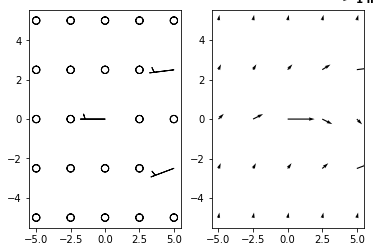

In [14]:
import matplotlib.pylab as plt
import numpy as np

x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
d = np.arctan(Y ** 2. - .25 * Y - X)
U, V = 5 * np.cos(d), np.sin(d)
# barbs plot
ax1 = plt.subplot(1, 2, 1)
ax1.barbs(X, Y, U, V)
#quiver plot
ax2 = plt.subplot(1, 2, 2)
qui = ax2.quiver(X, Y, U, V)
plt.quiverkey(qui, 0.9, 1.05, 1, '1 m/s',labelpos='E',fontproperties={'weight': 'bold'})

plt.show()

In [15]:
U,V

(array([[ 0.15991814,  0.17380794,  0.19033813,  0.21033995,  0.23503402],
        [ 0.4195676 ,  0.53032491,  0.71969923,  1.11412401,  2.35294118],
        [ 0.98058068,  1.85695338,  5.        ,  1.85695338,  0.98058068],
        [ 0.46851771,  0.61077601,  0.87516667,  1.52387864,  4.23999152],
        [ 0.17380794,  0.19033813,  0.21033995,  0.23503402,  0.26628821]]),
 array([[ 0.99948839,  0.99939563,  0.99927517,  0.99911475,  0.99889457],
        [ 0.99647304,  0.9943592 ,  0.98958644,  0.97485851,  0.88235294],
        [ 0.98058068,  0.92847669,  0.        , -0.92847669, -0.98058068],
        [ 0.99560014,  0.99251101,  0.98456251,  0.95242415,  0.52999894],
        [ 0.99939563,  0.99927517,  0.99911475,  0.99889457,  0.9985808 ]]))

In [16]:
X,Y

(array([[-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ]]),
 array([[-5. , -5. , -5. , -5. , -5. ],
        [-2.5, -2.5, -2.5, -2.5, -2.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 2.5,  2.5,  2.5,  2.5,  2.5],
        [ 5. ,  5. ,  5. ,  5. ,  5. ]]))

In [31]:
from math import exp 
xx = np.linspace(-2, 2, 0.2)
[x, y] = np.meshgrid(xx,xx);
z = x*exp(-x**2 - y**2);
[dx, dy] = gradient(z, .2, .2);
contour(x, y, z)
quiver(x, y, dx, dy)

SyntaxError: invalid syntax (<ipython-input-31-585ef63f83e8>, line 4)

In [1]:
!date

Вт дек 12 17:00:31 MSK 2017
